# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# import data 
transactions = pd.read_csv("../data/sample.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,CASH_IN,63516.66,C4651324,54465.00,117981.66,C1850473537,0.00,0.00,0,0
1,CASH_IN,159445.40,C1979267367,227600.92,387046.31,C1177644576,751211.13,591765.73,0,0
2,CASH_IN,77739.33,C1886966268,2040.00,79779.33,C1677904805,50056.00,2532.04,0,0
3,CASH_OUT,135334.88,C312314421,48786.00,0.00,C503930792,0.00,135334.88,0,0
4,CASH_IN,118393.70,C728959033,50962.00,169355.70,C279942911,0.00,167607.91,0,0


In [21]:
# TODO: view the shape of your data
print("Shape of transactions data:", transactions.shape)
print("\nTransactions data types:\n", transactions.dtypes)
print(transactions.describe())
print("Rows and columns:", transactions.shape)


Shape of transactions data: (10000, 10)

Transactions data types:
 type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object
             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  1.000000e+04   1.000000e+04    1.000000e+04    1.000000e+04   
mean   1.833531e+05   8.667190e+05    8.876482e+05    1.080919e+06   
std    6.609145e+05   2.995406e+06    3.029416e+06    3.172576e+06   
min    0.000000e+00   0.000000e+00    0.000000e+00    0.000000e+00   
25%    1.324366e+04   0.000000e+00    0.000000e+00    0.000000e+00   
50%    7.686000e+04   1.388600e+04    0.000000e+00    1.381296e+05   
75%    2.062364e+05   1.064295e+05    1.411135e+05    9.429199e+05   
max    3.738763e+07   3.110404e+07    3.118868e+07    1.386999e+08   

       newbalanceDest       

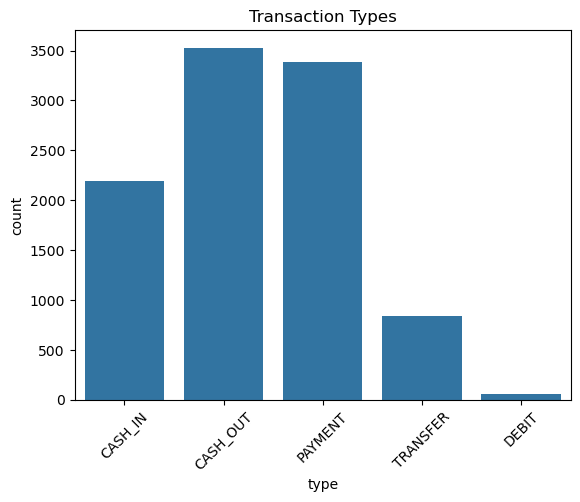

In [22]:
# TODO: Begin your EDA
# Plot transaction types
sns.countplot(x='type', data=transactions)
plt.title("Transaction Types")
plt.xticks(rotation=45)
plt.show()

In [23]:
# # Count of fraud vs non-fraud
print("\nFraudulent vs Non-Fraudulent:")
print(transactions['isFraud'].value_counts())



Fraudulent vs Non-Fraudulent:
isFraud
0    9985
1      15
Name: count, dtype: int64


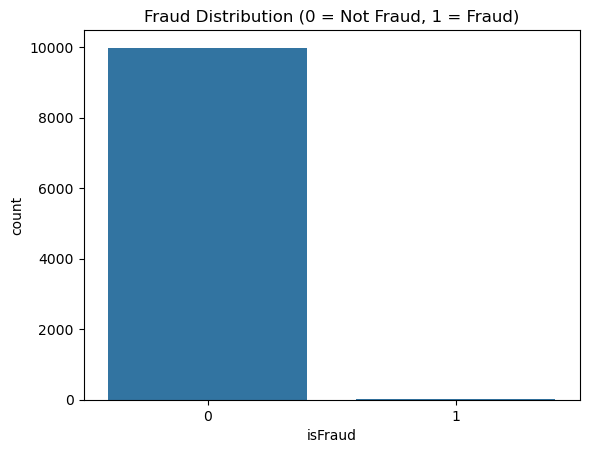

In [24]:
# Plot fraud distribution
sns.countplot(x='isFraud', data=transactions)
plt.title("Fraud Distribution (0 = Not Fraud, 1 = Fraud)")
plt.show()

In [25]:
# Which transaction types are most often fraud?
fraud_by_type = transactions[transactions['isFraud'] == 1]['type'].value_counts()
print("\nFraud by transaction type:")
print(fraud_by_type)



Fraud by transaction type:
type
CASH_OUT    9
TRANSFER    6
Name: count, dtype: int64


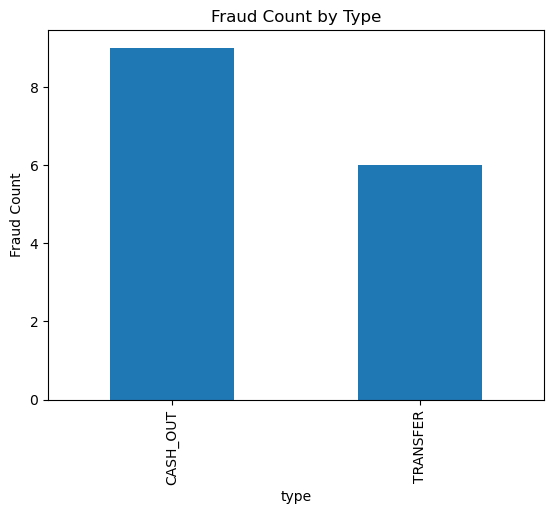

In [26]:
# Plot fraud by type
fraud_by_type.plot(kind='bar')
plt.title("Fraud Count by Type")
plt.ylabel("Fraud Count")
plt.show()

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Most transactions in the dataset are non-fraudulent, with less than 0.2% labeled as fraud. This high class imbalance is important to keep in mind for modeling and may require techniques like resampling or using class weights to improve detection performance.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Yes, frauds usually show up when the transaction amounts are really high. When you plot things like "amount" vs. account balances, you’ll see that most fraud cases bunch together at the upper end—high amounts and big jumps in balances, which you don’t see much with regular transactions.

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

Yes, frauds usually show up when the transaction amounts are really high. When you plot things like "amount" vs. account balances, you’ll see that most fraud cases bunch together at the upper end—high amounts and big jumps in balances, which you don’t see much with regular transactions.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

The system’s fraud flag doesn’t work very well. Most transactions flagged as fraud are actually not fraud, and many real frauds are not flagged at all. So, it misses a lot of fraud and also wrongly flags normal transactions. This means the current flag is not reliable for detecting fraud. The system needs better methods, like smarter models that look at more details, to spot fraud more accurately.

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

The system’s fraud flag needs major improvement. Better detection methods, like smarter machine learning models that use more data patterns, are needed to accurately spot real frauds and avoid false alarms.